# Analisis y modelado del sistema 

<style>
.justify-text {
  text-align: justify;
}
</style>

<div class="justify-text">
La epidemia del COVID-19


</div>

# Introducción
<style>
.justify-text {
  text-align: justify;
}
</style>

<div class="justify-text">



# Derivación del modelo


 El punto de partida es el modelo SEIR básico con la adición de un compartimento adicional L:
 </div>

$$
\begin{align}
    \frac{dS}{dt} &= -\frac{\beta IS}{N} \tag{1} \\
    \frac{dE}{dt} &= \frac{\beta IS}{N} - \epsilon E \tag{2} \\
    \frac{dI}{dt} &= \epsilon E - \gamma I \tag{3} \\
    \frac{dL}{dt} &= \gamma I - \delta L \tag{4} \\
    \frac{dR}{dt} &= \delta L \tag{5}
\end{align}
$$

- $N$: La población total.
- $S$: El número de individuos Susceptibles.
- $E$: El número de individuos Expuestos que han contraído la infección pero aún no son infecciosos.
- $I$: El número de individuos Infectados.
- $L$: El número de sujetos que aún están infectados pero ya no son infecciosos debido a hospitalización, cuarentena, o porque los sujetos infectados son mayormente infecciosos solo durante los primeros días después del final del período de latencia.
- $R$: El número de individuos Recuperados y resistentes a futuras infecciones.
- $\beta$: La tasa de transmisión efectiva.
- $\epsilon$: La tasa inversa del período promedio de incubación antes de que uno se vuelva infeccioso.
- $\gamma$: La tasa inversa del tiempo promedio que los sujetos infectados pasan siendo infecciosos.
- $\delta$: La tasa inversa del tiempo promedio que los sujetos infectados permanecen enfermos pero no infecciosos.


$$
\begin{align}
    \frac{dE_t}{dt} &= \beta(u(t), d(t))I_t - \epsilon E_t \tag{6} \\
    \frac{dI_t}{dt} &= \epsilon E_t - \gamma I_t \tag{7} \\
    \frac{dL_t}{dt} &= \gamma I_t - \delta L_t \tag{8} \\
    \frac{dT_t}{dt} &= \epsilon E_t \tag{9} \\
    N_r(t) &= \epsilon E_t(t - \tau_m) \tag{10} \\
    A_r(t) &= I_t(t - \tau_m) + L_t(t - \tau_m) \tag{11} \\
    T_r(t) &= T_t(t - \tau_m) \tag{12-}
\end{align}
$$

La tabla contiene los parametros para cada pais afectado por la enfermedad, como se observa a continuación:

<br>

<style>
.center {
  margin-left: auto;
  margin-right: auto;
}
table {
  width: 90%;
  border-collapse: collapse;
}
th, td {
  padding: 7px;
  text-align: center;
  border-bottom: 1px solid #ddd;
}

</style>

<center>

| País | Periodo                | $\beta_0$ | $1/\gamma$ | $1/\epsilon$ | $1/\delta$ | $t_{1}, \rho_{1}$ | $t_{2}, \rho_{2}$ | $R_0$ | $R_1$ | $R_2$ | $T_{d0}$ | $T_{d1}$ | $T_m$ |
|---------|-----------------------|---------------|----------------|------------------|----------------|----------------------|----------------------|-----------|-----------|-----------|-------------|-------------|------------|
| China   | 18/01/2020 - 11/02/2020 | 1.6           | 2.5            | 5.0              | N/A            | 0, 0.63              | 5, 0.160             | 4.0       | 2.5       | 0.64      | 2.5         | 4.3         | 12         |
| Italy   | 22/02/2020 - 01/05/2020 | 1.3           | 3.1            | 4.3              | 33             | 2, 0.56              | 19, 0.205            | 4.0       | 2.6       | 0.82      | 2.6         | 5.2         | 9          |
| France  | 28/02/2020 - 03/05/2020 | 1.3           | 2.9            | 5.0              | 29             | 2, 0.60              | 17, 0.195            | 3.8       | 2.8       | 0.74      | 2.8         | 5.3         | 12         |
| UK      | 01/03/2020 - 10/05/2020 | 1.28          | 2.8            | 6.2              | N/A            | 15, 0.65             | 25, 0.270            | 3.6       | 2.34      | 0.97      | 3.4         | 5.8         | 10         |

</center>  

<br>


Se realizará el analisis del modelo en python para cada caso.

# Simulación del Modelo COVID-19 en Python

Para realizar la simulación en python se utilizaran las librerias Solve_ivp, matplotlib y numpy, en donde se van a ocupar en cada caso.

In [1461]:

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

## Modelo evaluado en parametros de Reino Unido

Se reemplazo el modelo Covid en los parametros del Reino unido:

In [1462]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.28  #Tasa de transmisión inicial
gamma = 1/2.8  #Tasa de recuperación
epsilon = 1/6.2  #Tasa de incubación
delta = 0  #Tasa de mortalidad
tau_m = 10  #Retraso en días
t1 = 15
rho1 = 0.65
t2 = 25
rho2 = 0.27

In [1463]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [1464]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [1465]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [1466]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [1467]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])


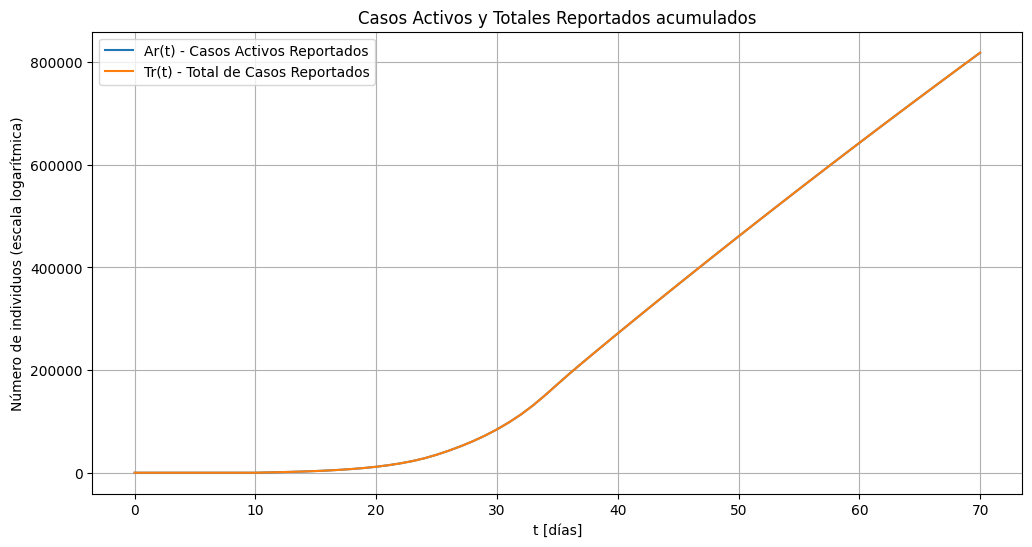

In [1468]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale()  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

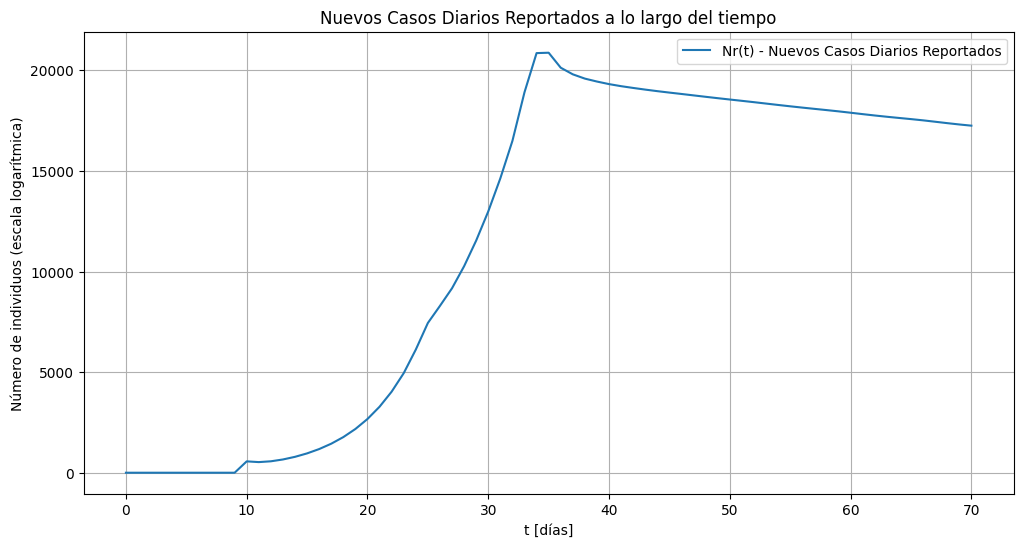

In [1469]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

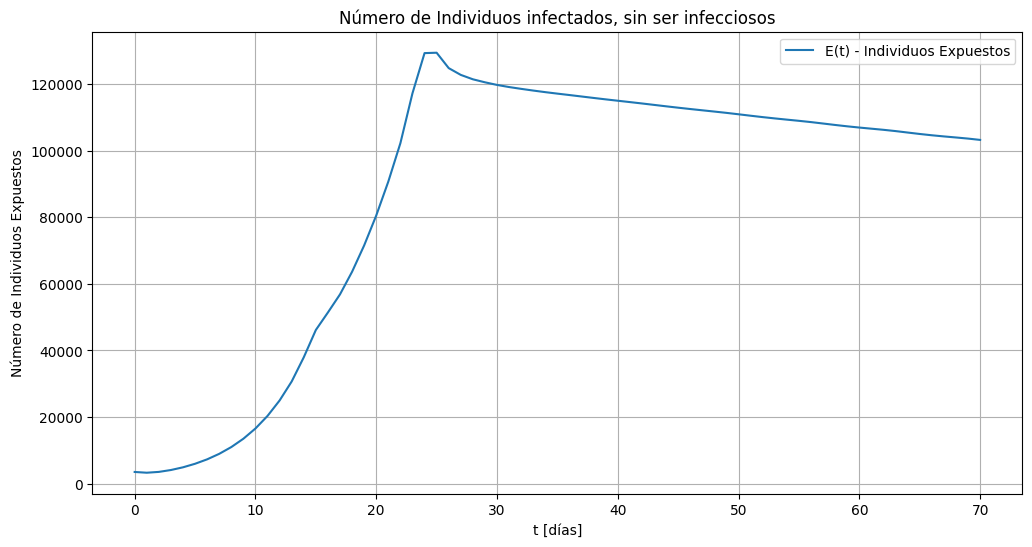

In [1470]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

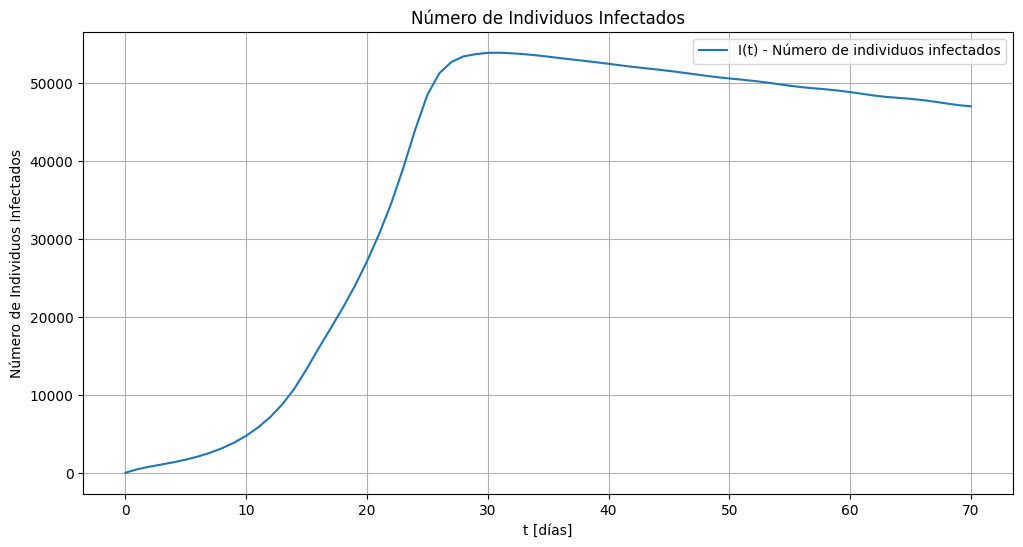

In [1471]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

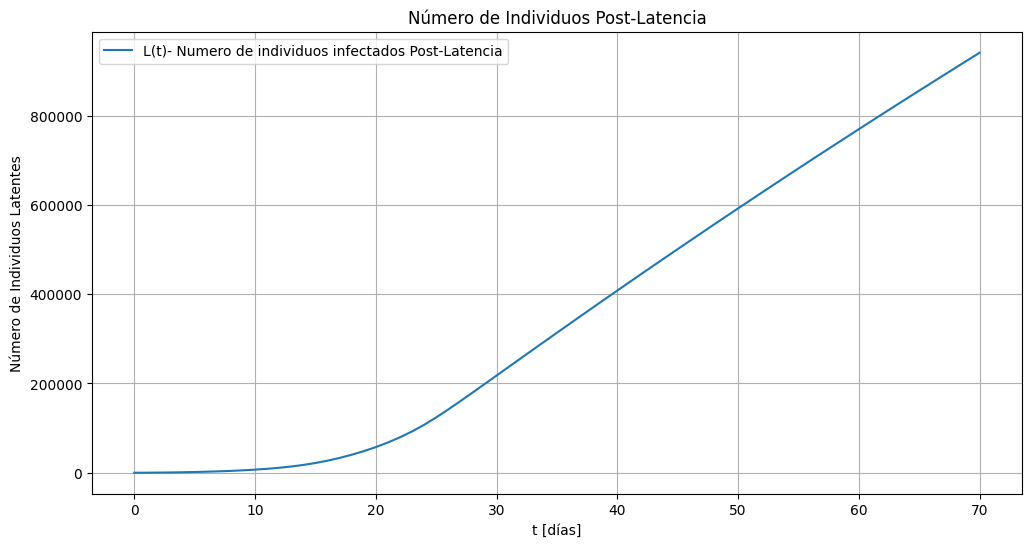

In [1472]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

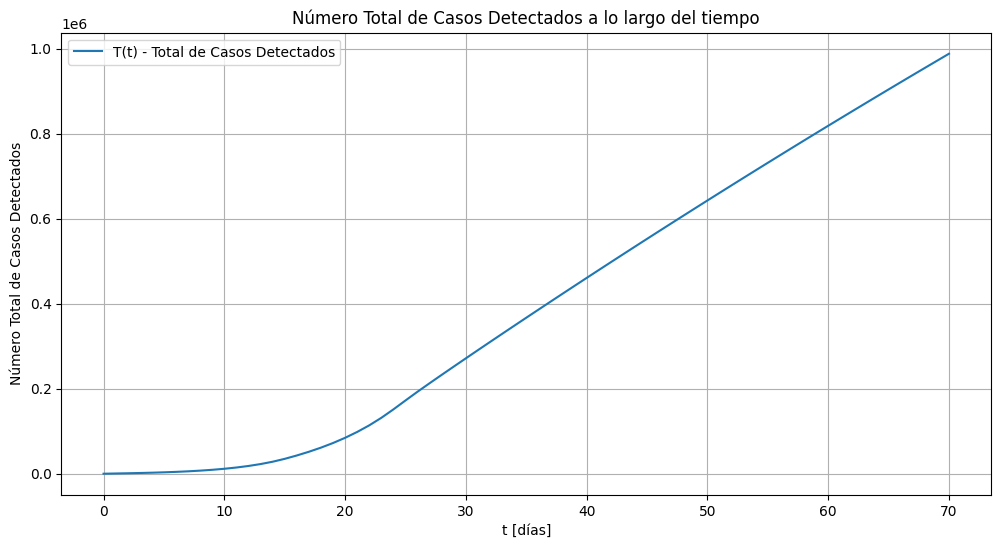

In [1473]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de China

Se reemplazo el modelo Covid en los parametros del China:

In [1474]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.6  #Tasa de transmisión inicial
gamma = 1/2.5  #Tasa de recuperación
epsilon = 1/5  #Tasa de incubación
delta = 0  #Tasa de mortalidad
tau_m = 12  #Retraso en días
t1 = 0
rho1 = 0.63
t2 = 5
rho2 = 0.160

In [1475]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [1476]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [1477]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [1478]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [1479]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

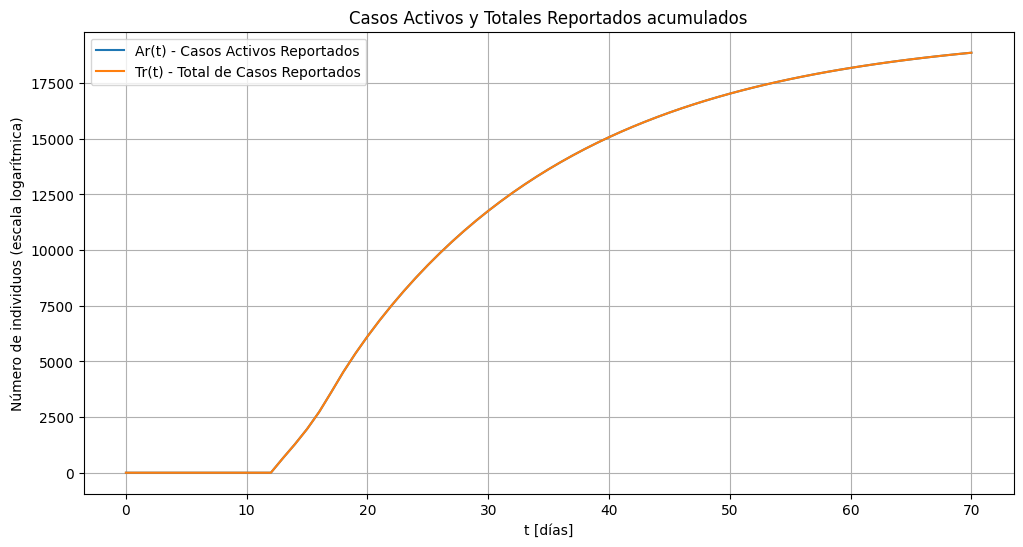

In [1480]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

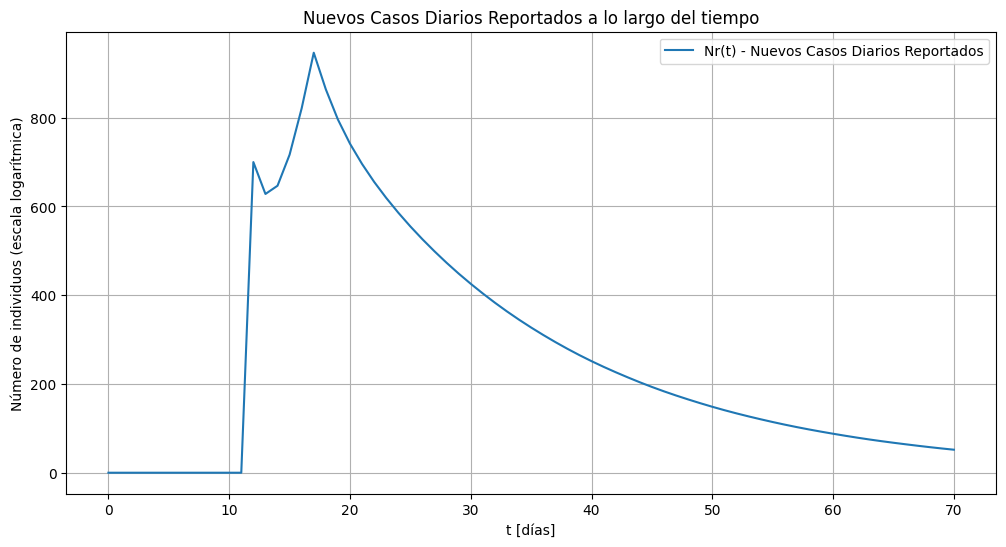

In [1481]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

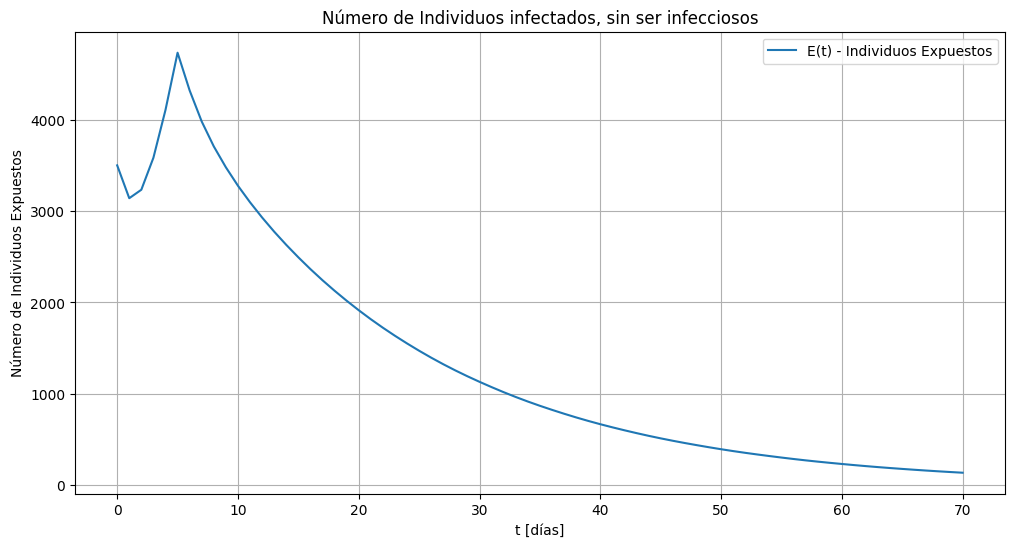

In [1482]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

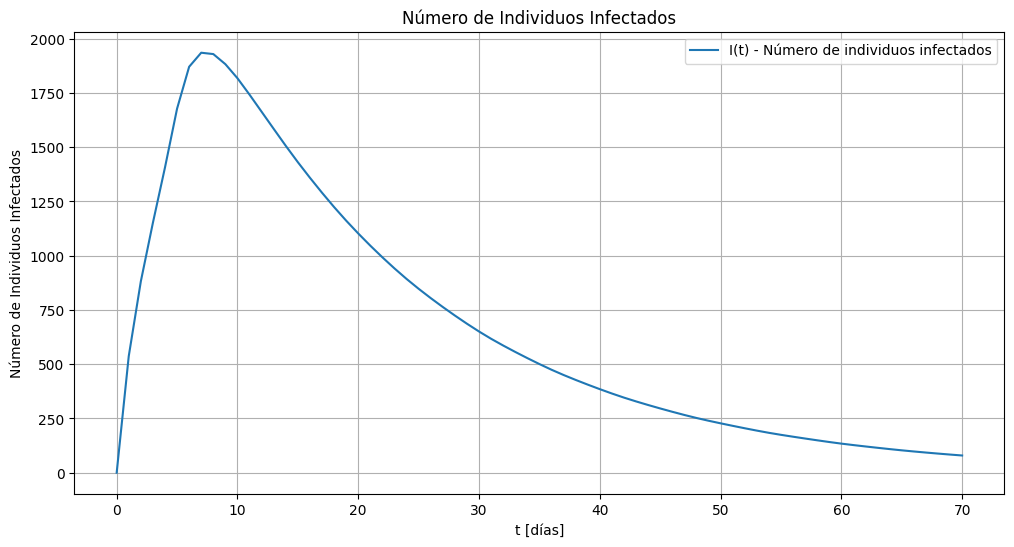

In [1483]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

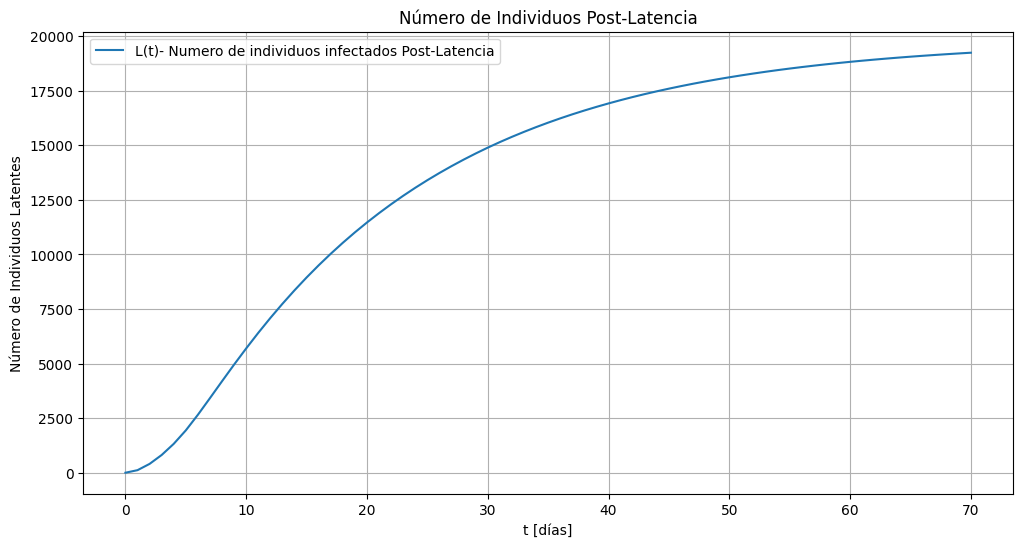

In [1484]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

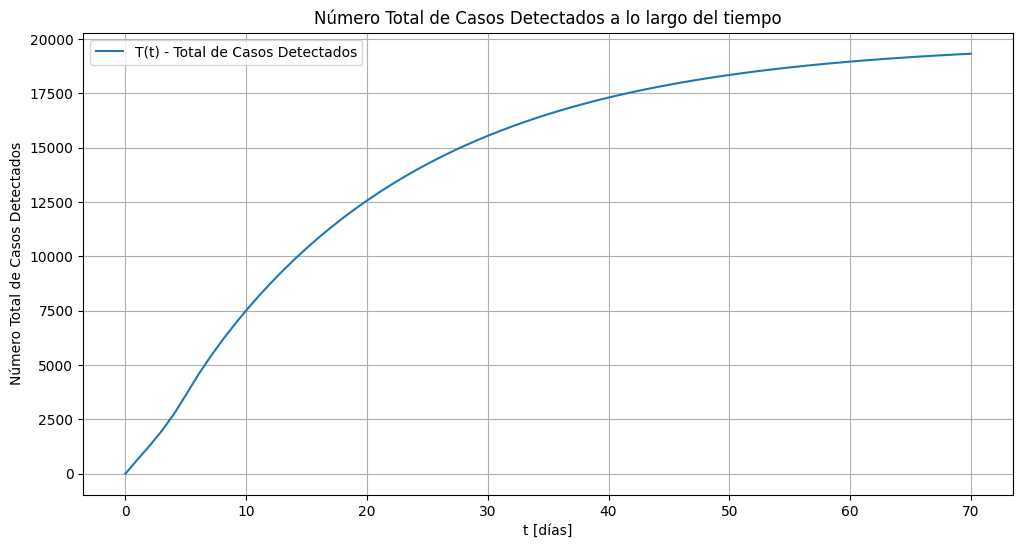

In [1485]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de Italia

Se reemplazo el modelo Covid en los parametros del Italia:

In [1486]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de transmisión inicial
gamma = 1/3.1  #Tasa de recuperación
epsilon = 1/4.3  #Tasa de incubación
delta = 1/33  #Tasa de mortalidad
tau_m = 9  #Retraso en días
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205

In [1487]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [1488]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [1489]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [1490]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [1491]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

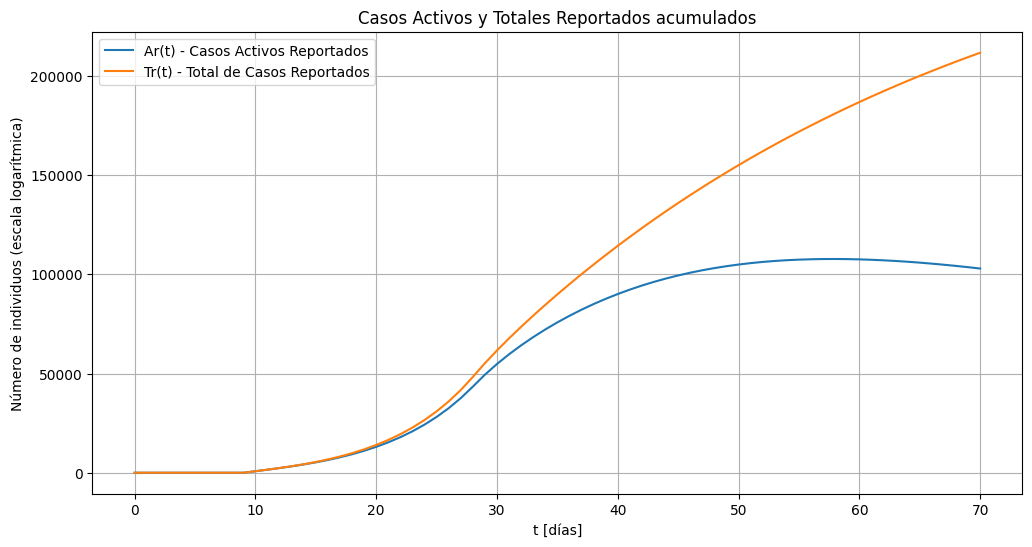

In [1492]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

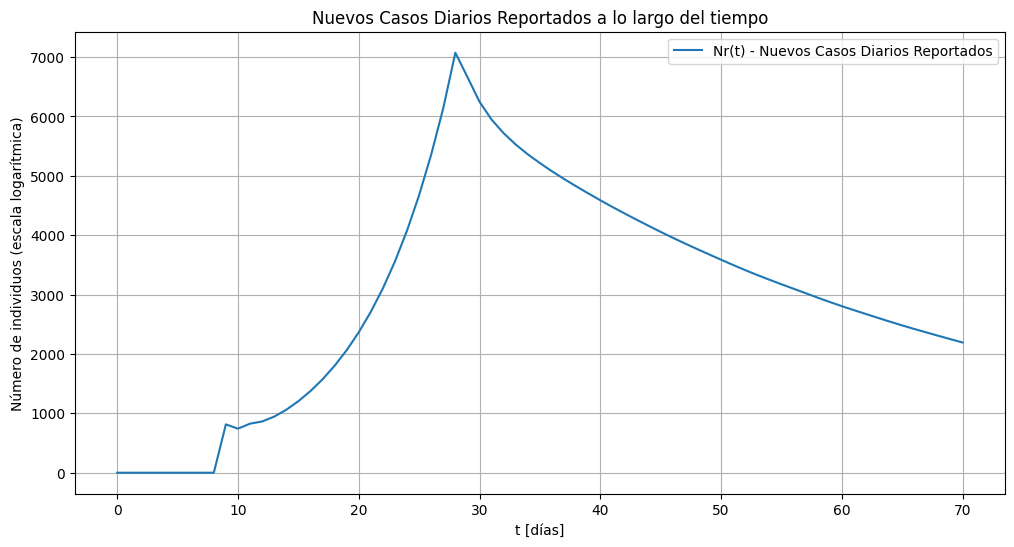

In [1493]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

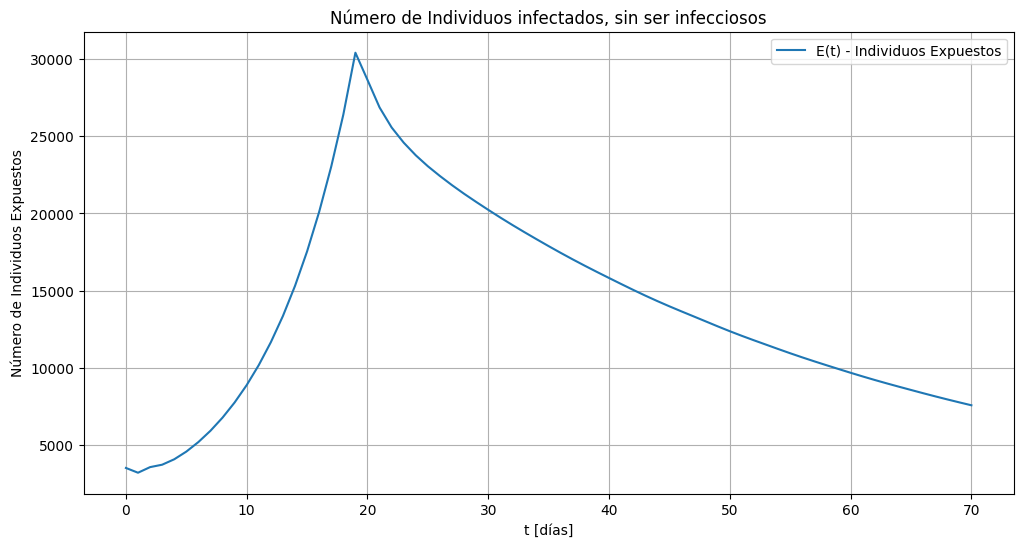

In [1494]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

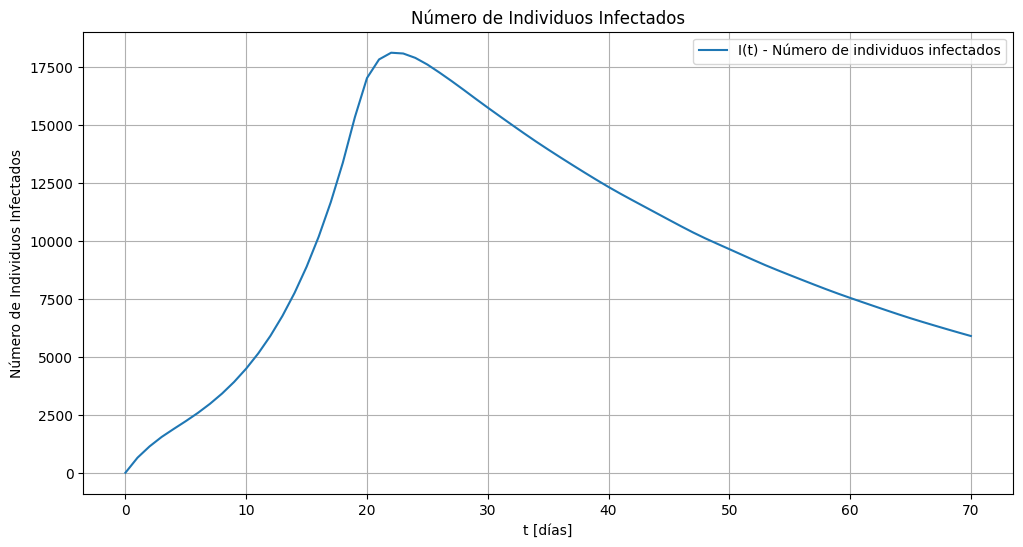

In [1495]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

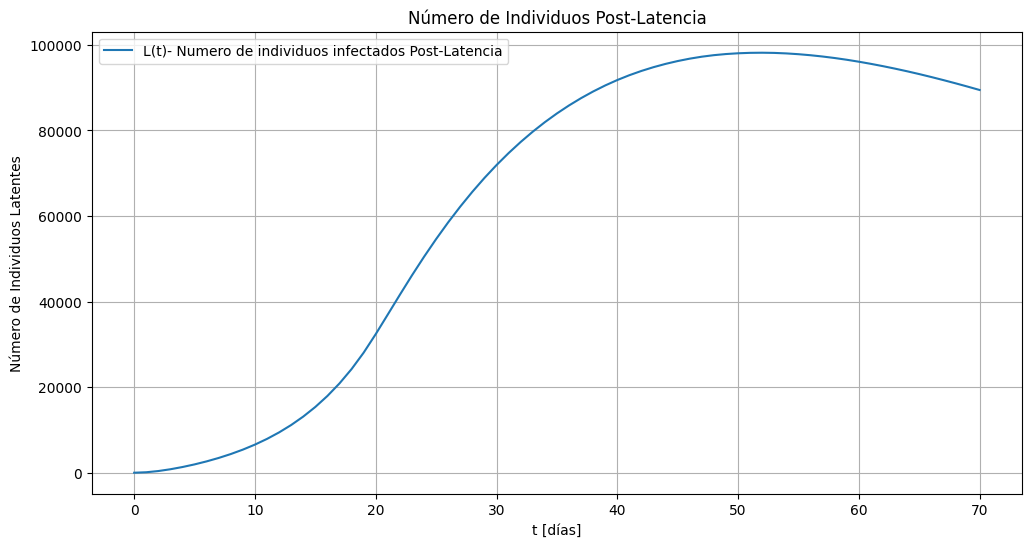

In [1496]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

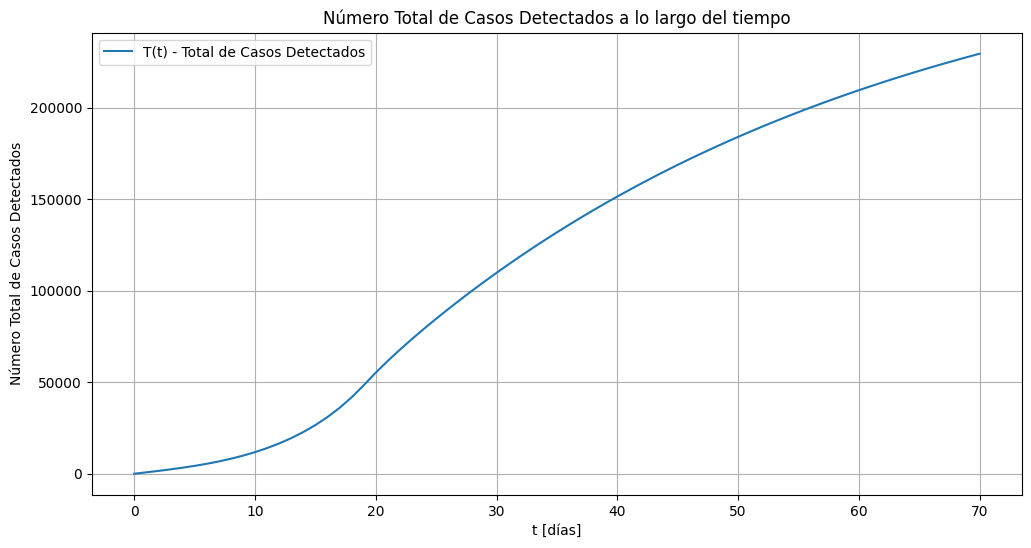

In [1497]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de Francia

Se reemplazo el modelo Covid en los parametros del Francia:

In [1498]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de transmisión inicial
gamma = 1/2.9  #Tasa de recuperación
epsilon = 1/5.0  #Tasa de incubación
delta = 29  #Tasa de mortalidad
tau_m = 12  #Retraso en días
t1 = 2
rho1 = 0.60
t2 = 17
rho2 = 0.195

In [1499]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [1500]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [1501]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [1502]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [1503]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else E0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

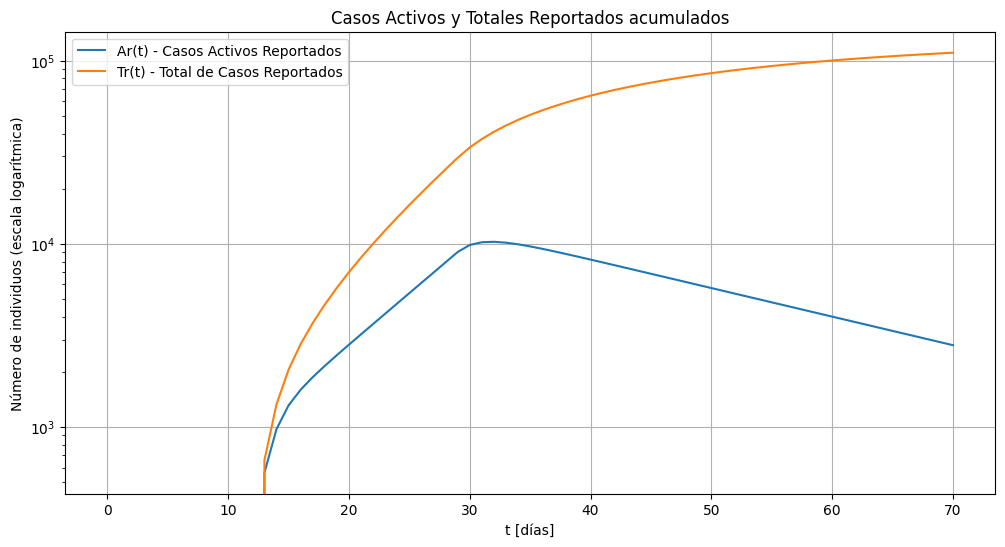

In [1504]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

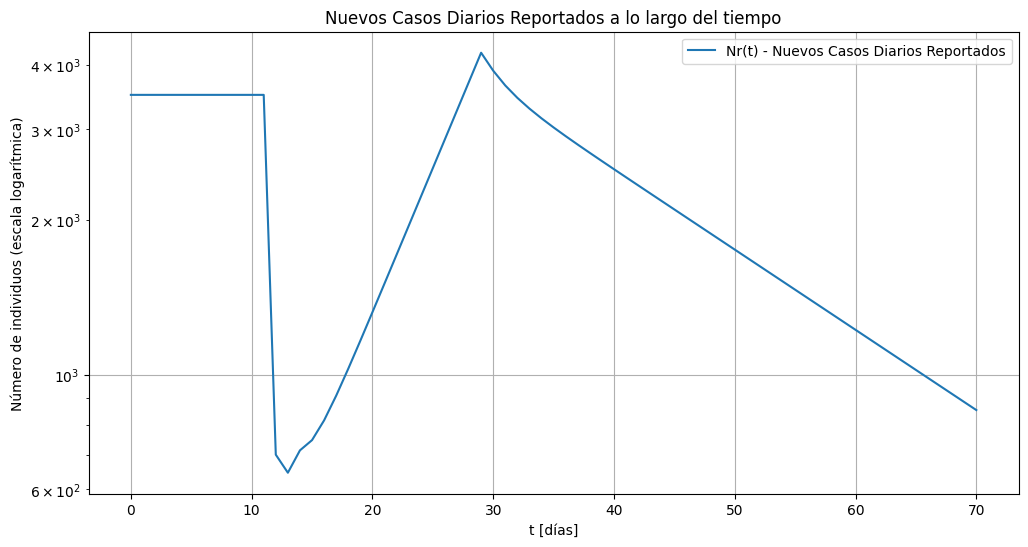

In [1505]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

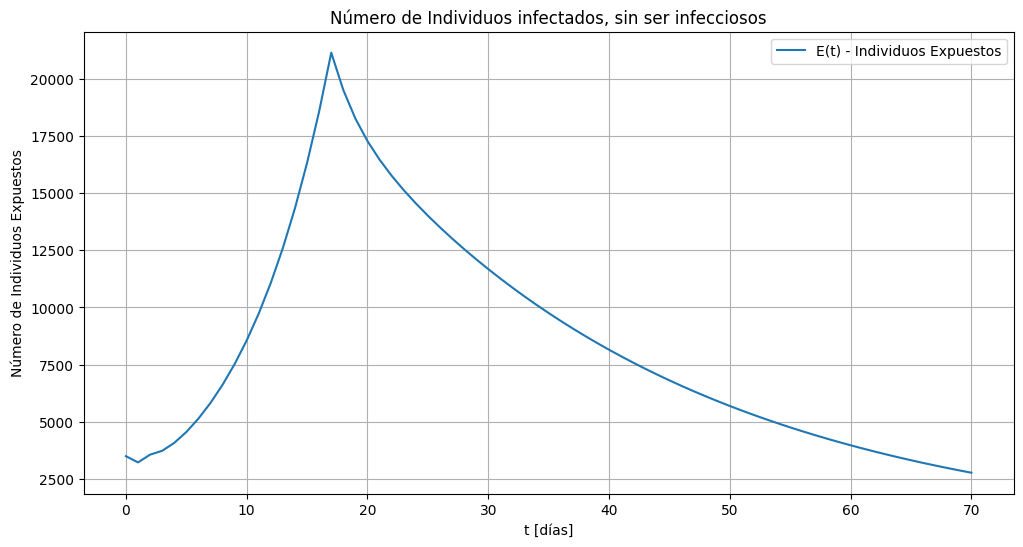

In [1506]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

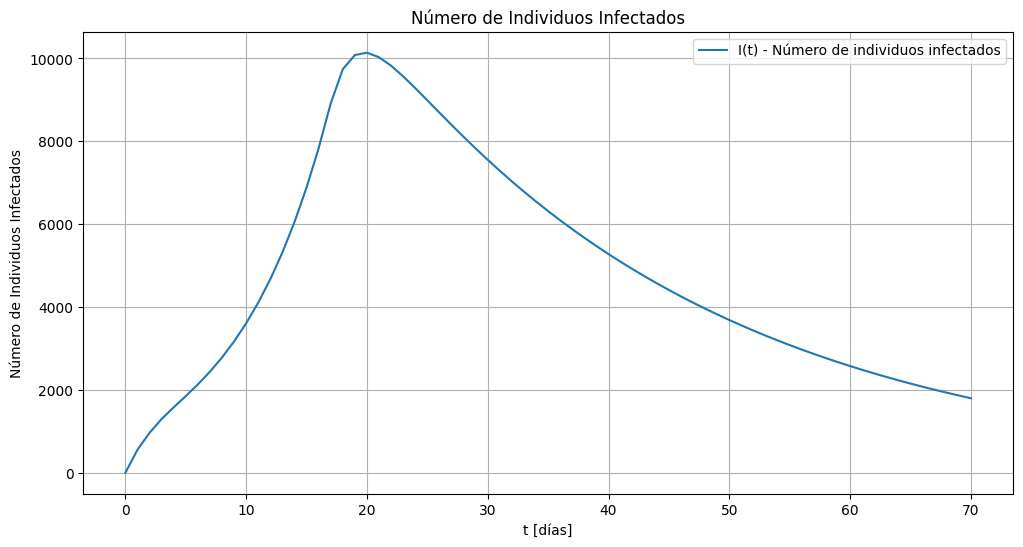

In [1507]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

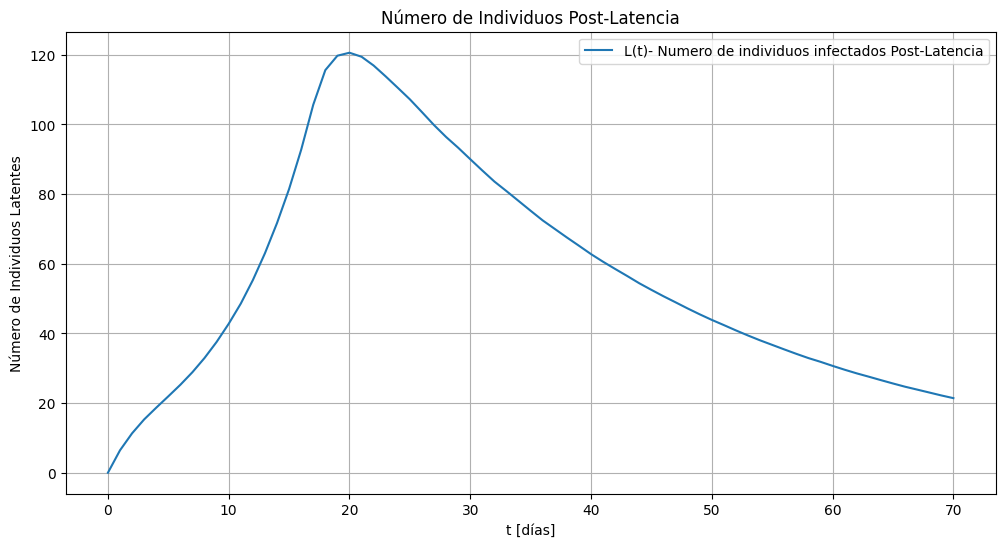

In [1508]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

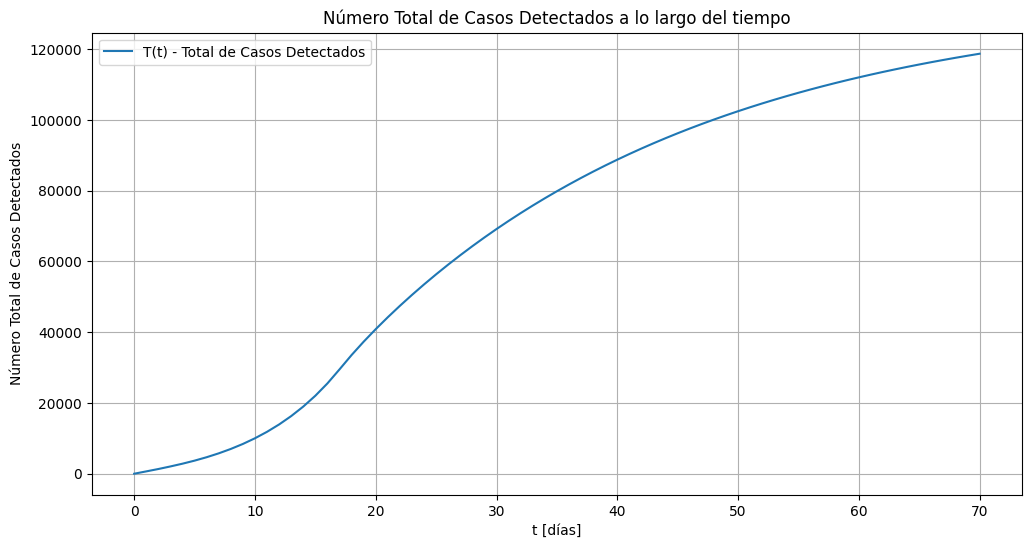

In [1509]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()